In [20]:
%load_ext zipline

The zipline extension is already loaded. To reload it, use:
  %reload_ext zipline


c:\users\michael.li\appdata\local\continuum\miniconda3\envs\env_zipline\lib\site-packages\empyrical\stats.py:704: RuntimeWarning: invalid value encountered in true_divide
  out=out,
c:\users\michael.li\appdata\local\continuum\miniconda3\envs\env_zipline\lib\site-packages\empyrical\stats.py:790: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)


[2018-09-16 08:15:10.688221] INFO: zipline.finance.metrics.tracker: Simulated 1007 trading days
first open: 2014-01-02 14:31:00+00:00
last close: 2017-12-29 21:00:00+00:00


c:\users\michael.li\appdata\local\continuum\miniconda3\envs\env_zipline\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)
c:\users\michael.li\appdata\local\continuum\miniconda3\envs\env_zipline\lib\site-packages\pyfolio\tears.py:200: UserWarning: The latest version of pyfolio requires users to supply benchmark returns. Your current tearsheets will not include plots and analyses that require a benchmark. In the future, please pass benchmark_rets, or pass None to silence this warning.
  warnings.warn(BENCHMARK_RETS_WARNING)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,0.03,2015-04-27,2015-08-24,2017-02-08,468
1,0.01,2017-05-12,2017-06-16,2017-08-02,59
2,0.01,2017-09-01,2017-09-25,2017-10-30,42
3,0.01,2017-12-18,2017-12-29,NaT,NaN
4,0.01,2017-11-09,2017-12-06,2017-12-18,28


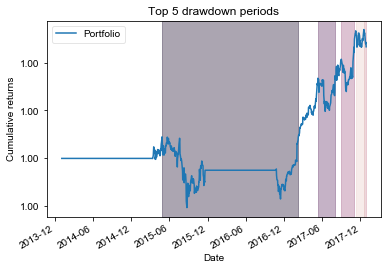

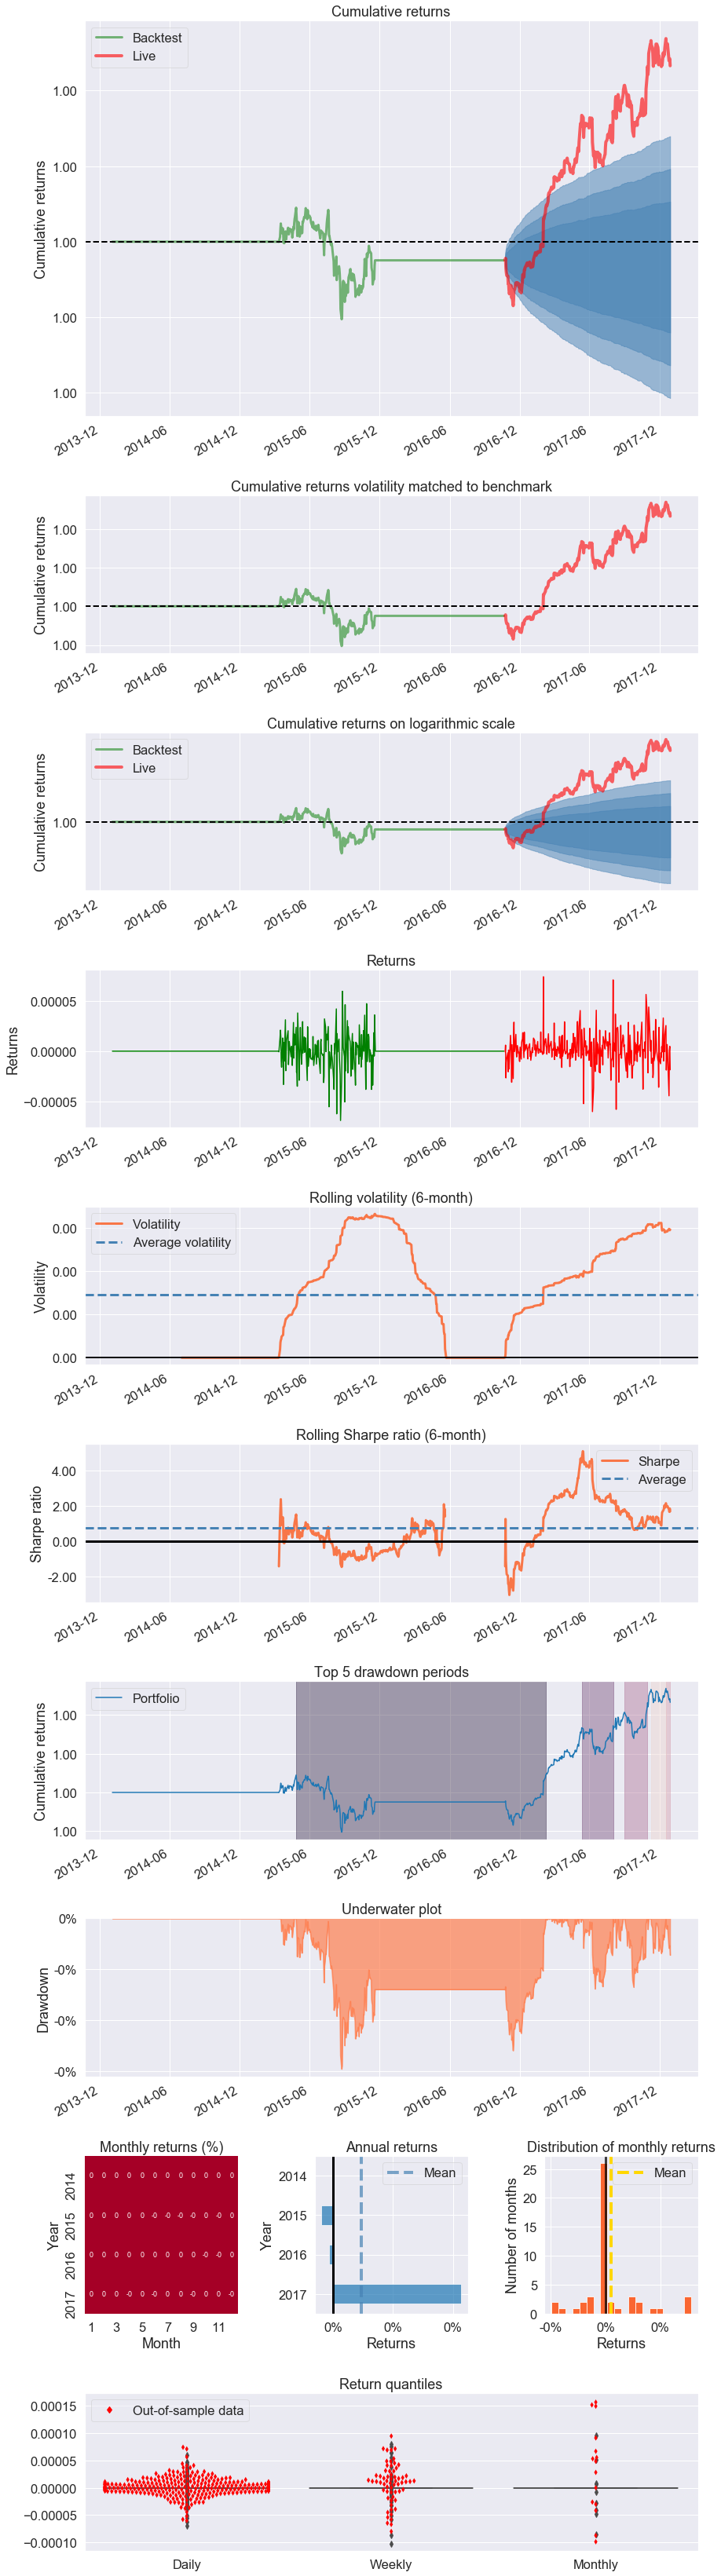

Stress Events,mean,min,max
Apr14,0.00%,0.00%,0.00%
Oct14,0.00%,0.00%,0.00%
Fall2015,-0.00%,-0.01%,0.01%
New Normal,0.00%,-0.01%,0.01%


AttributeError: 'NoneType' object has no attribute 'copy'

In [21]:
%%zipline --start 2014-1-1 --end 2018-1-1 -o dma.pickle
from zipline.api import order_target,record,symbol
import matplotlib.pyplot as plt
import pyfolio as pf

def initialize(context):
    context.i = 0
    context.asset = symbol('AAPL')

def handle_data(context,data):
    context.i += 1
    if context.i < 300:
        return 
    #Compute averages 
    #data.history() has to be called with the same params
    short_mavg = data.history(context.asset,'price',bar_count=100,frequency="1d").mean()
    long_mavg = data.history(context.asset,'price',bar_count=300,frequency="1d").mean()
    
    if short_mavg > long_mavg:
        order_target(context.asset,100)
    elif short_mavg < long_mavg:
        order_target(context.asset,0)
        
    #Save values for later inspection
    record(AAPL=data.current(context.asset,'price'),short_mavg=short_mavg,long_mavg=long_mavg)
    
def analyze(context,perf):
    returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf)
    pf.plot_drawdown_periods(returns, top=5).set_xlabel('Date')
    pf.create_full_tear_sheet(returns, positions=positions, transactions=transactions,
                          live_start_date='2016-10-22', round_trips=True)

NameError: name 'get_pricing' is not defined